### Problem Description

- First problem is remove null rows from the df
- Second problem is to get to know more about the data (by plots)
- Third problem is  to know the revenue from every customer
- Fourth problem is how to Aggregate Revenue & Quantity

Link to download the data : https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

## Packages

In [180]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [181]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail', dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [182]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [183]:
missing_percentage =  df.isnull().sum() * 100 / len(df)
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [184]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
df.dropna(subset=['CustomerID'], inplace=True)

In [185]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

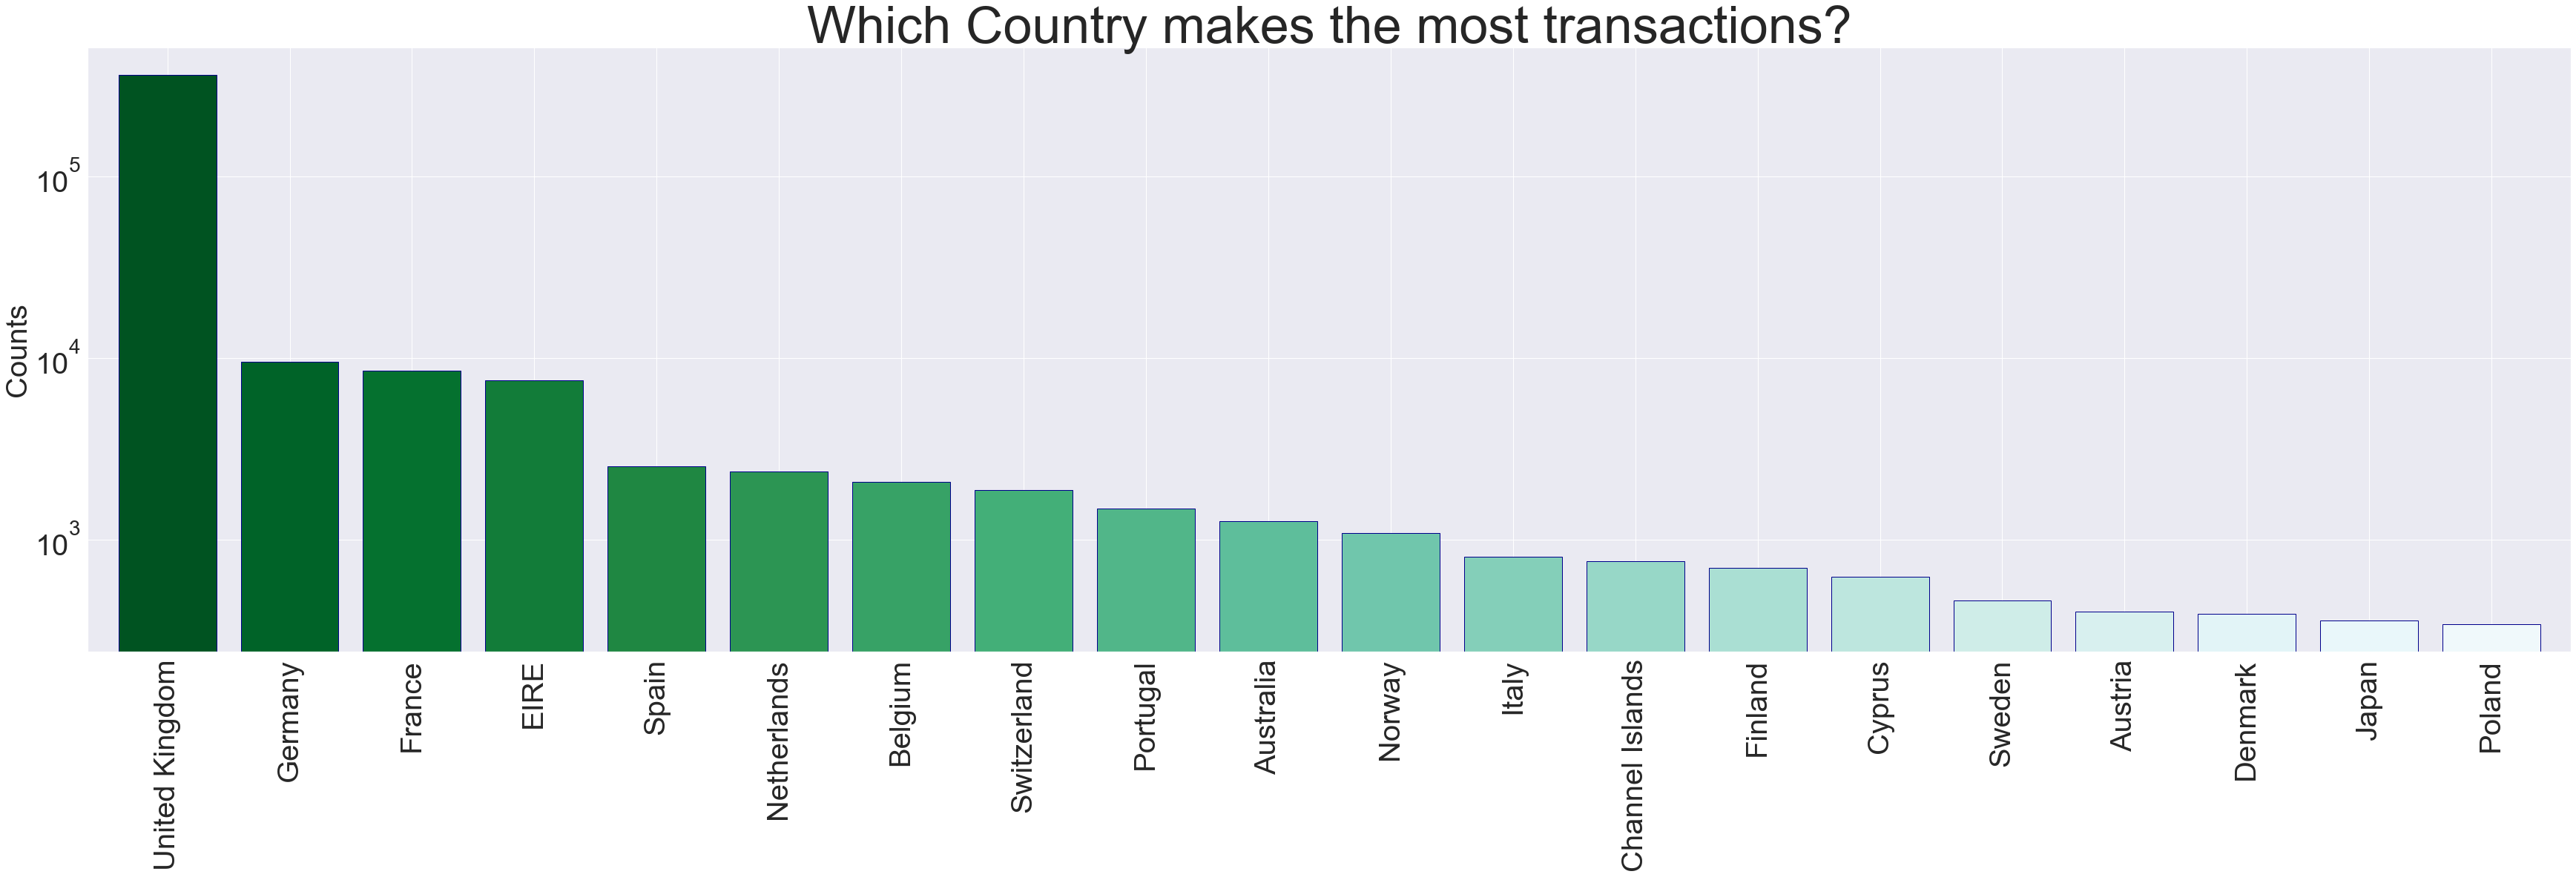

In [186]:
x = df.Country.value_counts()[:20]
plt.figure(figsize=(60,15))
plt.yscale('log')
plt.xticks(size=40)
plt.yticks(size=40)
plt.ylabel("Counts",size=40)
plt.title("Which Country makes the most transactions?",size = 70)  
x.plot(kind = 'bar',color = sns.color_palette('BuGn_r',len(x)),width = 0.8,edgecolor = 'darkblue')
plt.show()          


### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [187]:
df['Revenue'] = df.Quantity*df.UnitPrice
df_top_10= df.groupby('CustomerID')["Revenue"].sum()
df_top_10.sort_values(0,False).reset_index().head(10)

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [196]:
df1 = pd.DataFrame(columns =['CustomerID', 'Frequency'])
df1.CustomerID = df.CustomerID
df1.Frequency = df.CustomerID
df_top_cust = df1.groupby('CustomerID')['Frequency'].describe()['count']
df_top_cust = df_top_cust.sort_values(0 ,False).reset_index().head(5)
df_top_cust

,CustomerID,count
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [189]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

D:\python\anaconda\envs\NewEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


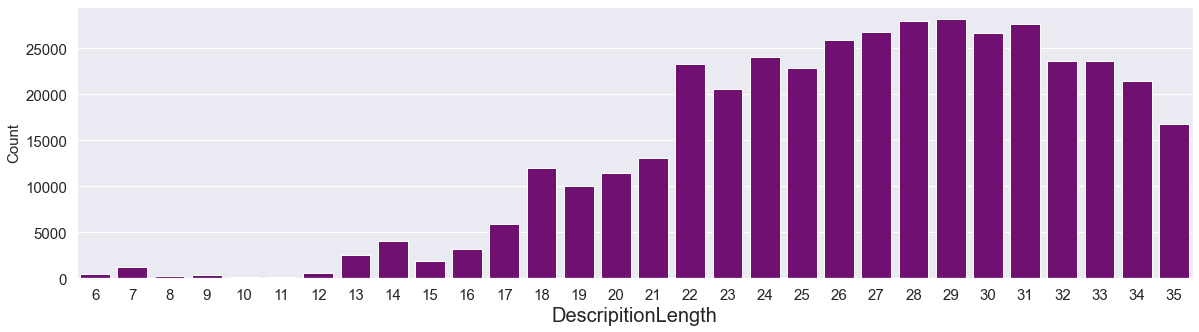

In [190]:
X = df.Description.apply(len).value_counts().index
Y = df.Description.apply(len).value_counts().values
plt.figure(figsize=(20,5));
sns.barplot(X, Y,palette=[ "purple"])
plt.xlabel("DescripitionLength",size=20)
plt.ylabel("Count",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
sns.set_style("darkgrid")

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [191]:
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] =df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df["Date"] = df.InvoiceDate.dt.date

D:\python\anaconda\envs\NewEnv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [192]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [193]:
grouped_features = ["Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode", "Description"]

In [194]:
daily_data = df.groupby(grouped_features)["Quantity", "Revenue"].sum()
daily_data = daily_data.reset_index()
daily_data.head()

D:\python\anaconda\envs\NewEnv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Description,Quantity,Revenue
0,2010,4,12,48,2,335,1,10002,INFLATABLE POLITICAL GLOBE,60,51.00
1,2010,4,12,48,2,335,1,10125,MINI FUNKY DESIGN TAPES,2,1.70
2,2010,4,12,48,2,335,1,10133,COLOURING PENCILS BROWN TUBE,5,4.25
3,2010,4,12,48,2,335,1,16014,SMALL CHINESE STYLE SCISSOR,10,4.20
4,2010,4,12,48,2,335,1,16016,LARGE CHINESE STYLE SCISSOR,10,8.50


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook